# Домашнее Задание №2



*Выполнила: Колмакова Римма Павловна БМЭ214*

- Ниже приведены несколько датасетов, их необходимо проанализировать и ответить на определенные вопросы
- Для ответа на эти вопросы нужно сделать следующее:
   - Сделать хорошую визуализацию исследуемых переменных
   - Для каждой из задач подобрать **все подходящие** параметрические и непараметрические критерии, проанализировать результаты этих критериев (тут имеет смысл обернуть все критерии в фунцию или словарь - как удобно)
   - Для каждого набора данных проверьте нормальность выборки и допустимость использования параметрических критериев (можно прокомментировать гистограмму и воспользоваться соответствующими критериями согласия)
   - Не забудьте оставить краткие комментарии к вашим действиям и сформулировать выводы, которые вы сделали в ходе анализа


## Связанные выборки

### seattle
В файле seattle.txt записаны цены на недвижимость в одном из районов Сиэтла в 2001 году и в 2002 году (объекты недвижимости выбирались случайно). Изменились ли в среднем цены в этом районе за год?


In [ ]:
import pandas as pd
import numpy as np

from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('seattle.txt', sep='\t')
data.sample(5)

,Price,Year
97,172.0,2001
46,987.5,2002
42,290.0,2002
49,190.0,2002
87,569.0,2001


**(1 БАЛЛ)**. Визуализируем значения цен (переменной `Price`) за 2001 и 2002 годы. Постройте несколько графиков (boxplot, violinplot). Сделайте выводы о том, как меняется распределение цены в зависимости от года. Сделайте выводы касательно среднего и дисперсии. Предположите, глядя на графики, изменилась ли цена?

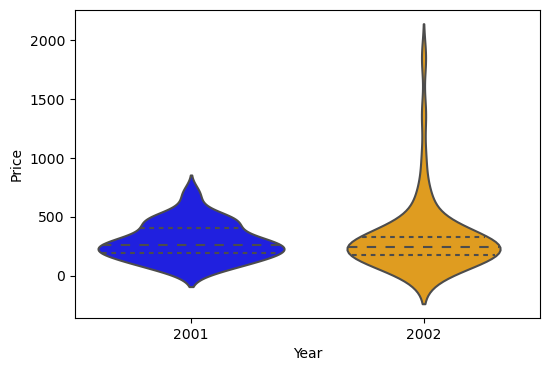

In [ ]:
sns.violinplot(data=data, x="Year", y="Price", palette = ["b", "orange"], inner="quartiles")
fig = plt.gcf()
fig.set_size_inches(6, 4)

<AxesSubplot:xlabel='Year', ylabel='Price'>

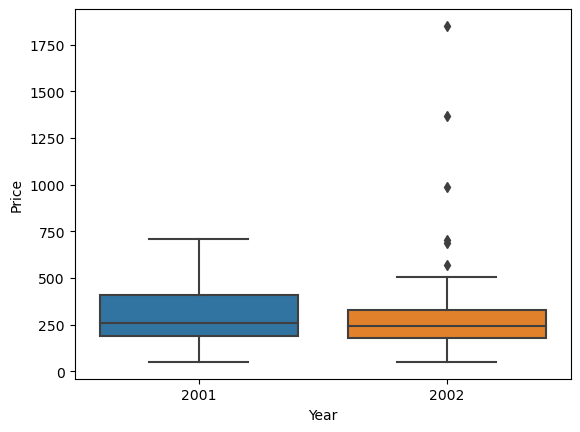

In [ ]:
sns.boxplot(y = data['Price'], x = data['Year'])

In [ ]:
data.groupby("Year")["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2001,50.0,288.92654,157.777757,50.0,190.25,260.800,406.7375,710.0
2002,50.0,329.25714,316.830045,50.0,176.20,244.925,328.6250,1850.0


In [ ]:
pd.DataFrame(data.groupby("Year")["Price"].var())

,Price
Year,
2001,24893.820587
2002,100381.277553


**Выводы по графикам:**

1) Сделайте выводы о том, как меняется распределение цены в зависимости от года.
- согласно графикам и свойствам дискриптивных статистик, распределение цен в 2002 измененилось относительно 2001: мы видим, что в 2002 появились выбросы, то есть квартиры с очень высокой ценой (точки выше 75% квартиля на графике "ящик с усами"), это почти не повлияло на медиану (черта внутри в ящиках), что логично, ведь она устойчива к выбросам.

2) Сделайте выводы касательно среднего и дисперсии.
- однако среднее неустойчиво к выбросам, и появление их в 2002 году повлияло на значение mean, оно сдвинулось в большую сторону (выросло), аналогичное изменение произошло и с дисперсией - увеличился разбос значений случайной величины (цены квартиры) относительно ее матожидания.

3) Предположите, глядя на графики, изменилась ли цена?
- если предполагать, что при выборе квартиры люди ориентируются на среднюю цену в районе, то за год произошел рост (подорожание) за счет появления выбросов (экстремально высоких значений на графике), однако о такой тенденции мы можем говорить только в контексте приведенной выборки. Чтобы делать точные предположения, мы должны либо располагать исчерпываюшими данными о ценах на недвижимость в районе Сиэтла за 2 года, либо тестировать гипотезы для проверки статистических утверждений о параметрах и свойствах генеральной совокупности на основе выборочных данных. Первый способ невсегда выполним ввиду ограниченного набора источников информации, закрытых данных или элементарного отсутствия нужной информации, поэтому вариант тестирования гипотез наиболее предпочтим для статистичеких исследований.

Переходим к тестированию гипотез.




**(2 БАЛЛА)**. Сформулируйте нулевую и альтернативную гипотезу. Выберите $\alpha$. Обоснуйте свой выбор касательно альтернативы (одно- или двусторонняя гипотеза). Выберите критерий, которым Вы будете проверять гипотезу, выпишите его формулу и распределение, которому этот критерий подчиняется при справедливости нулевой гипотезы. Обоснуйте свой выбор.

Мы хотим узнать, изменились ли в среднем цены на недвижимость в выбранном районе в Сиэтле в 2002 относительно 2001. Предположим, что цены в 2002 относительно 2001 года не изменились.
Рассмотрим изменение цен на квартиры между 2001 и 2002 годом:

$$d_{i\ }=x_{i}-y_{i}$$


Для тестирования гипотезы об отсутствии изменения воспользуемся $t$-тестом, пусть мы допускаем ошибку первого рода **0.05**:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm} \text{цены в среднем в 2002 не изменились, то есть остались как 2001} \\
&H_1: \hspace{2mm}\mu_1-\mu_2  \ne 0 \hspace{2mm} \text{есть различия}
\end{aligned}
$$

Критерий:

$$
t\ =\ \dfrac{\bar{d}-0}{\sqrt{\dfrac{s^{2}}{n}}}\sim t\left(n-1\right)
$$

**(2 БАЛЛА)** Реализуйте Ваш критерий и сам механизм проверки гипотезы вручную. Сделайте вывод об отвержении или не отвержении гипотезы. Сравните свои результаты со встроенным тестом из пакета scipy.stats (если он там есть)

In [ ]:
price_1 = data[data["Year"] == 2001]["Price"]
price_2 = data[data["Year"] == 2002]['Price']

In [ ]:
d = np.array(price_2) - np.array(price_1)

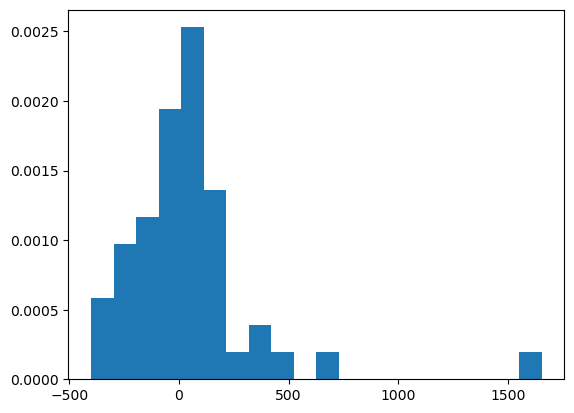

In [ ]:
d_mean = d.mean()
d_std = d.std(ddof=1)
n = d.size

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 300)
ys = stats.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.show()

# Распределение разности оценок схоже c нормальным => можем использовать тестом Стьюдента

In [ ]:
# статистика и p-value "своими руками"
t_obs = d.mean()/np.sqrt(d.var(ddof=1)/d.size)
p_val = 2*(stats.t.cdf(-np.abs(t_obs), d.size-1))

print('t-наблюдаемое:', t_obs)
print("p-value:", p_val)

t-наблюдаемое: 0.9054576456583359
p-value: 0.369653808711352


In [ ]:
from scipy.stats import ttest_rel
ttest_rel(price_1, price_2)

Ttest_relResult(statistic=-0.9054576456583359, pvalue=0.369653808711352)

**Выводы:** основная гипотеза **не отвергается** на уровне значимости 5%, так как **p_value оказалось больше альфы**

=> разница между средними оказалась *статистически незначима* для генеральной совокупности:

$$
\begin{aligned}
&H_0: \hspace{2mm} \mu_1-\mu_2 = 0 \hspace{2mm} \text{цены в среднем в 2002 не изменились, то есть остались как 2001} \\
\end{aligned}
$$

Таким образом, в ген. совокупности средние по ценам в 2х годах равны.

## Несвязанные выборки

### mtcars
В файле mtcars.csv находятся данные из американского журнала Motor Trend 1974 года. Они описывают расход топлива в зависимости от 10 характеристик автомобиля (все автомобили 1973-1974 года). А именно, в данных вы найдете следующие столбцы:
1. mpg — расход топлива (миль/галлон);
2. cyl — количество цилиндров мотора;
3. disp — объем мотор (куб. дюйм);
4. hp — мощность мотора (в лошадиных силах);
5. drat — передаточное число редуктора заднего моста;
6. wt — вес (тысяч фунтов);
7. qsec — время, за которое автомобиль проезжает 1/4 мили;
8. vs — тип двигателя (0 = V-образный, 1 = рядный);
9. am — тип коробки передач (0 = автоматическая, 1 = ручная);
10. gear — количество передних передач;
11. carb — количество карбюраторов.

Мы хотим ответить на следующие вопросы:

- Влияет ли тип двигателя на расход топлива?
- Влияет ли объем мотора на расход топлива?

**(1 БАЛЛ)**. Постройте графики для каждого вопроса. Для первого вопроса можете вновь использовать violinplot, но можете подобрать и другой график. Подумайте, какой график подходит для второго вопроса и нарисуйте его. Попробуйте сделать выводы на основе этих графиков (как распределены признаки, их средние и дисперсии).

In [ ]:
df = pd.read_csv('mtcars.csv', index_col=0)
print(df.shape)
df.sample(5)

(32, 11)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
manufacturer,,,,,,,,,,,
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,0,3,2
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,0,3,3
Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8


Text(0, 0.5, 'расход топлива (миль/галлон)')

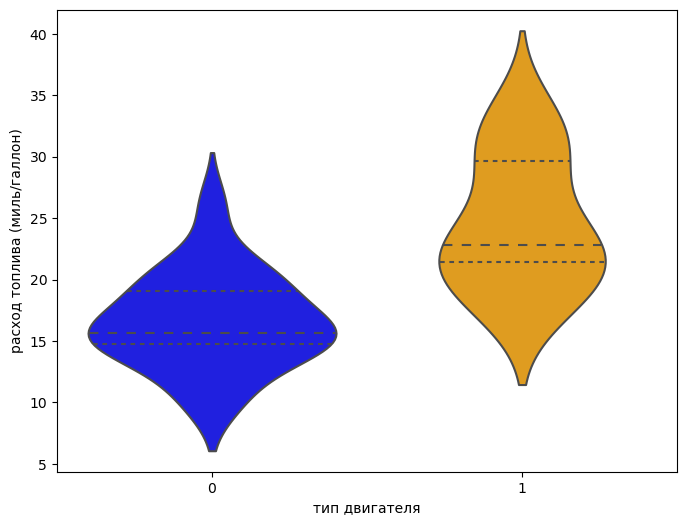

In [ ]:
df_3 = pd.concat([df['vs'], df['mpg']], axis=1)
sns.violinplot(df_3=df_3, x=df_3["vs"], y=df_3["mpg"], palette = ["b", "orange"], inner="quartiles")
fig = plt.gcf()
fig.set_size_inches(8, 6)

plt.xlabel("тип двигателя")
plt.ylabel("расход топлива (миль/галлон)")

Text(0, 0.5, 'расход топлива (миль/галлон)')

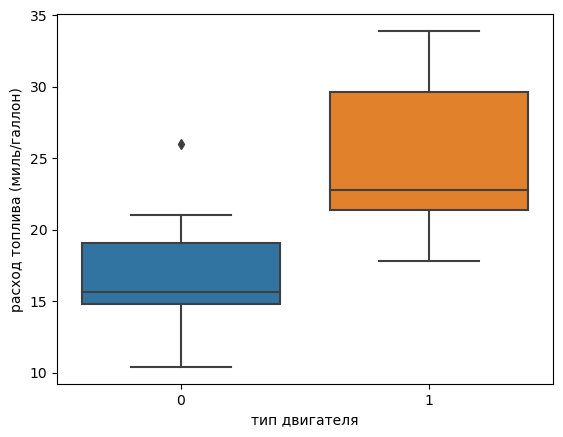

In [ ]:
sns.boxplot(y = df['mpg'], x = df['vs'])
plt.xlabel("тип двигателя")
plt.ylabel("расход топлива (миль/галлон)")

Text(0, 0.5, 'объем мотор (куб. дюйм)')

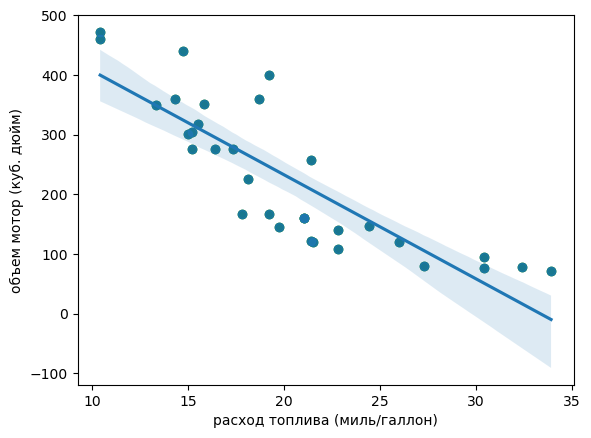

In [ ]:
plt.scatter(df['mpg'], df['disp'], c = "g")
sns.regplot(x = df['mpg'],
            y = df['disp'],
            data = df)
plt.xlabel("расход топлива (миль/галлон)")
plt.ylabel("объем мотор (куб. дюйм)")

In [ ]:
print(df_3[df_3["vs"] == 1]['mpg'].mean())
print(df_3[df_3["vs"] == 0]['mpg'].mean())
print(df_3[df_3["vs"] == 1]['mpg'].var())
print(df_3[df_3["vs"] == 0]['mpg'].var())

24.557142857142857
16.616666666666664
28.933406593406588
14.904999999999996


**ВЫВОДЫ по графикам:**
1. Влияет ли тип двигателя (0 = V-образный, 1 = рядный) на расход топлива (миль/галлон)?
- согласно violinplot можно сказать, что первый тип двигателя требует больше топлива, и расход поэтому больше. Минимальное значение для первого двигателя больше (стартует в отрезке от 10 до 15), когда у нулевого (V-образного) оно меньше 10, также значение большей плотности выше у первого по отношение с нулевым.
2. Влияет ли объем мотора на расход топлива?
- диаграмма рассеивания хорошо описывает характер зависимости одной количественной переменной от другой
- по линии тренда можно сказать, что переменные находятся в обратной зависимости, то есть чем меньше объем мотора, тем больше расход топлива, и наоборот, однако такой график не отображает реальной причино-следственной связи между переменными и не говорит насколько сильно переменные связаны.
3. Попробуйте сделать выводы на основе этих графиков (как распределены признаки, их средние и дисперсии)
- Чтобы сделать выводы касаемо распределения признаков на violinplot можно сравнить форму каждого графика: так график для первого типа двигателя (рядного) имеет две широких области плотности, одна из которых расположена в верхней части, что указывает на достаточно большое количество относительно высоких значений расхода топлива в данных по этому типу двигателя. Более того, по графику видно что дискриптивные статистики (медиана, 25% и 75% квартили) у 2х типов двигателей отличаются => первый тип двигателя (рядной) имеет более высокие показатели по сравнению с нулевым (V-образным). По данным графикам нельзя точно оценить средние и дисперсии, однако можно предположить, что значения средней и дисперсии у рядного будут выше (смещение вверх за счет  наличия высоких значений).

- По графику номер 3, диаграмма рассеяния, нельзя точно оценить средние значения признаков и их дисперсии, нужен иной анализ располагаемой выборки наблюдений. Тем не менее можно сделать определенные выводы относительно корреляции между переменными, ссылаясь на степень разброса точек вокруг проведенной прямой. Так, мы имеем нехаотичный характер разброса точек на плоскости, они расположены близко к прямой, что указывает на наличие линейной зависимости между взятыми признаками.

**(2 БАЛЛА)**. Реализуйте решение для первого вопроса. Подумайте как можно измерить влияние типа двигателя на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

1. Влияет ли тип двигателя на расход топлива? Да, влияет. Докажем это.

Мы хотим узнать, есть статистически значимая зависимость между бинарной переменной "тип двигателя" и количественной переменной "расход топлива", то есть мы хотим проверить гипотезу, что в генеральной совокупности есть линейная связь между переменной расход топлива и тип двигателя. Так как мы имеет дело с одной вещественной переменной, перекодируем ее значения, создав новую бинарную переменную "расход", поставив медианное значение расхода топлива в качестве порога.

С помощью критерия независимости хи-квадрат (критерий независимости Пирсона) на основании выборки проверим наличие зависимости между двумя признаками в генеральной совокупности. Основная и альтернативная гипотезы таковы:

$$
\begin{aligned}
&H_0: \text{в ген. совокупности не существует зависимости между типом двигателя и расходом топлива.} \\
&H_1: \text{в ген. совокупности существует зависимость между типом двигателя и расходом топлива.}
\end{aligned}
$$

Уровень значимости равен 5% (𝛼 = 0.05).

In [ ]:
median = df["mpg"].median()
df["расход"] = df["mpg"].apply(lambda x: 1 if x > median else 0)
ct_o = df.groupby("vs")["расход"].value_counts().unstack()
ct_o

расход,0,1
vs,,
0,14,4
1,3,11


По данным полученной таблицы, мы видим, что у "V-образного" двигателя (0) расход топлива чаще всего не превышает медианного значения, когда у "рядного" (1) превалирующее число наблюдений находится в отрезке от медианного и выше => что говорит о том, целесообразно протестировать гипотезу о том, что в генеральной совокупности пропорции распределения расхода топлива для "V-образного" двигателя (не) отличаются от пропорций распределения расхода топлива для "рядного".

Расчет степеней свободы будет произведен по следующей формуле:

$
df = {(R–1)*(C–1)}
$

где R и C — количество рядов и колонок в таблице сопряженности соответственно

In [ ]:
dof = (2-1)*(2-1)
alpha = 0.05
critical_value = 3.84
# через таблицу критерия Пирсона, входные данные - число степеней свободы (1) и уровень значимости (0.05)

Рассчивывать ожидаемые частоты для таблицы сопряженности будем по формуле:

$
f_e = \frac{f_cf_r}{n}
$

где fc - наблюдаемые частоты в ряду, а fr — наблюдаемые частоты в колонке.

In [ ]:
vs_0_0 = ct_o[0].sum() * ct_o.iloc[0].sum() / df.shape[0]
vs_0_1 = ct_o[1].sum() * ct_o.iloc[0].sum() / df.shape[0]

vs_1_0 = ct_o[0].sum() * ct_o.iloc[1].sum() / df.shape[0]
vs_1_1 = ct_o[1].sum() * ct_o.iloc[1].sum() / df.shape[0]

ct_e = pd.DataFrame(np.array([[vs_0_0, vs_0_1],
                 [vs_1_0, vs_1_1]]))
ct_e

,0,1
0,9.5625,8.4375
1,7.4375,6.5625


In [ ]:
chi_square = round(((ct_o - ct_e)**2 / ct_e).sum().sum(), 2)
chi_square

10.04

Итак, чтобы сделать вывод об отвержении нулевой гипотезы, будем сравнивать найденное значение (chi_square) с границей критической области, посчитанной из таблицы выше (critical_value): **10.04 > 3.84**

In [ ]:
print(chi_square > critical_value)

True


Таким образом, мы отвергаем нулевую гипотезу в пользу альтернативной на уровне значимости 5%, то есть в генеральной совокупности существует зависимость между типом двигателя и расходом топлива.

- Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть).

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(ct_o)

(7.905882352941176,
 0.004927430103394077,
 1,
 array([[9.5625, 8.4375],
        [7.4375, 6.5625]]))

Воспользовавшись встроенной функцией из модуля scipy.stats, можно сделать аналогичный вывод о том, что нулевую гипотеза отвергается в пользу альтернативной, то есть в генеральной совокупности существует зависимость между типом двигателя и расходом топлива, так как значение p-value меньше 𝛼: **≈0.005 < 0.05**. Стоит отметить, что данный исход выполнялся бы и при меньшей альфе, например, 0.01

Данную задачу можно было решить проще, воспользовавшись способом, по которому была решена следующая задача ↓↓↓.

In [ ]:
# приведу кратное решение через функцию модуля scipy.stats
from scipy.stats import pearsonr

In [ ]:
pearsonr(df["mpg"], df["vs"])

PearsonRResult(statistic=0.6640389191275929, pvalue=3.4159372544199445e-05)

In [ ]:
print(3.4159372544199445e-05 < 0.05)
# p-value меньше 𝛼 =>
# H0: ρ = 0, в ген. совокупности не существует зависимости между типом двигателя и расходом топлива отвергается
# в пользу альтернативной 𝐻1:ρ ≠ 0.

True


**(2 БАЛЛА)**. Реализуйте решение для второго вопроса. Подумайте как можно измерить влияние объема мотора на расход топлива. Предложите алгоритм и опишите механизм проверки гипотезы в данном задании. Какие должны быть гипотезы? Выберите $\alpha$. Реализуйте этот алгоритм (статистику и распределение) и вручную проверьте Ваши гипотезы, сделайте вывод. Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть). Постарайтесь записать гипотезы красиво)

2. Влияет ли объем мотора на расход топлива? Да, влияет. Докажем это.

Мы хотим узнать, есть ли статистически значимая зависимость между переменной "объем мотора" и переменной "расход топлива", то есть мы хотим проверить гипотезу, что в генеральной совокупности данные переменные коррелируют между собой, то есть их коэффициент корреляции не равен 0.

$$
\begin{aligned}
&H_0: \text{ρ = 0, в ген. совокупности не существует зависимости между объемом мотора и расходом топлива.} \\
&H_1: \text{ρ ≠ 0, в ген. совокупности существует зависимости между объемом мотора и расходом топлива.}
\end{aligned}
$$

Для тестирования гипотезы о существовании линейной зависимости между признаками воспользуемся $t$-тестом, уровень значимости равен 5% (𝛼 = 0.05).



Сформулируем критерий, предполагая, что выборка получена из нормального распределения ген. совокупности.

Пусть:

$X$ - объем мотора "disp", $Y$ - расход топлива "mpg"

Статистика: $t = \frac{r_{X, Y} \sqrt{n-2}}{\sqrt{1 - r^2_{X, Y}}} \sim T_{n-2}$, где $T_{n-2}$ распределение Стьюдента.

Выборочный коэффициент корреляции Пирсона:
$r_{X,Y} = \frac{\frac{1}{n} \sum \limits_{i=1}^n (x_i - \overline X)(y_i - \overline Y) }{ \sqrt{D^*_X D^*_Y}}$, где $D^*_X = \frac{1}{n} \sum \limits_{i=1}^n (x_i - \overline X)^2$ и $D^*_Y = \frac{1}{n} \sum \limits_{i=1}^n (y_i - \overline Y)^2$

In [ ]:
new_data = pd.concat([df['disp'], df['mpg']], axis=1)
new_data.sample(5)

,disp,mpg
manufacturer,,
Merc 230,140.8,22.8
Datsun 710,108.0,22.8
Dodge Challenger,318.0,15.5
Merc 280C,167.6,17.8
Merc 450SLC,275.8,15.2


In [ ]:
new_data["X - Mx"] = new_data["disp"] - new_data["disp"].mean()
new_data["Y - My"] = new_data["mpg"] - new_data["mpg"].mean()
new_data.head()

,disp,mpg,X - Mx,Y - My
manufacturer,,,,
Mazda RX4,160.0,21.0,-70.721875,0.909375
Mazda RX4 Wag,160.0,21.0,-70.721875,0.909375
Datsun 710,108.0,22.8,-122.721875,2.709375
Hornet 4 Drive,258.0,21.4,27.278125,1.309375
Hornet Sportabout,360.0,18.7,129.278125,-1.390625


In [ ]:
sum_all = (new_data["X - Mx"]*new_data["Y - My"]).sum()
D_x = (new_data["X - Mx"]**2).sum()
D_y = (new_data["Y - My"]**2).sum()

r_x_y = sum_all/np.sqrt(D_x * D_y)
r_x_y

# промежуточный итог: отрицательная корреляция как предсказывалось на диаграмме рассеяния (график №3)

-0.8475513792624786

In [ ]:
t_obs = (r_x_y * np.sqrt(new_data.shape[0] - 2))/(1 - r_x_y**2)
t_obs

-16.481875836837744

In [ ]:
t_critical_value = scipy.stats.t.ppf(1 - alpha/2, new_data.shape[0] - 2)
t_critical_value

2.0422724563012373

Итак, чтобы сделать вывод об отвержении нулевой гипотезы, будем сравнивать модуль найденного значения t-наблюдаемого (t_obs) с границей критической области (t_critical_value): **≈16.48 > 2.04**

In [ ]:
print(abs(t_obs) > t_critical_value) # значение t-stat в критической области

True


Таким образом, мы отвергаем нулевую гипотезу в пользу альтернативной на уровне значимости 5%, то есть в генеральной совокупности существует зависимость между объем мотора и расходом топлива, коэффициент корреляции не равен 0.

- Сверьте Ваш результат со встроенной функцией из модуля scipy.stats (если она есть).

In [ ]:
from scipy.stats import pearsonr

In [ ]:
pearsonr(new_data["disp"], new_data["mpg"])

PearsonRResult(statistic=-0.8475513792624787, pvalue=9.380326537381398e-10)

Воспользовавшись встроенной функцией из модуля scipy.stats, можно сделать аналогичный вывод о том, что нулевую гипотеза отвергается в пользу альтернативной, то есть в генеральной совокупности существует зависимость между объемом мотора и расходом топлива, так как значение p-value меньше 𝛼: **9.380326537381398e-1 < 0.05**. Стоит отметить, что данный исход выполнялся бы и при меньшей альфе, например, 0.01